# *Graph Mining* 

### Importing the necessary libraries 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\ramam\Desktop\Final_students_data.csv")
df

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio,Cluster
0,Laila Mansour,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist,Laila has always been fascinated by the patter...,1
1,Omar Al-Hassan,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst,A forth-year student at Princess Sumaya Univer...,2
2,Rania Khoury,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer,Rania entered the University of Jordan's Compu...,0
3,Khaled Abbas,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist,Khaled has a knack for translating data into m...,1
4,Nour Husseini,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst,"In her Third year at Petra University, Nour is...",2
...,...,...,...,...,...,...,...,...,...
252,Reem Basim,1,JavaScript; SQL; Python,Web Development Intro,3,Tech Enthusiasts,Frontend Developer,Reem is a first-year Computer Science student ...,0
253,Yousef Wael,3,Python; SQL; C++,Cyber Defense Specialist,5,Network Security Society,Network Security Engineer,Yousef is a third-year Cyber Security student ...,2
254,Dalia Samir,2,Python; SQL; R,Intro to AI,4,Data Science Society,AI Developer,Dalia is a second-year Data Science student at...,1
255,Nabil Majed,1,Java; SQL; Python,Database Admin Basics,3,Database Club,Database Administrator,Nabil is a senior Computer Science student at ...,0


## Question 3

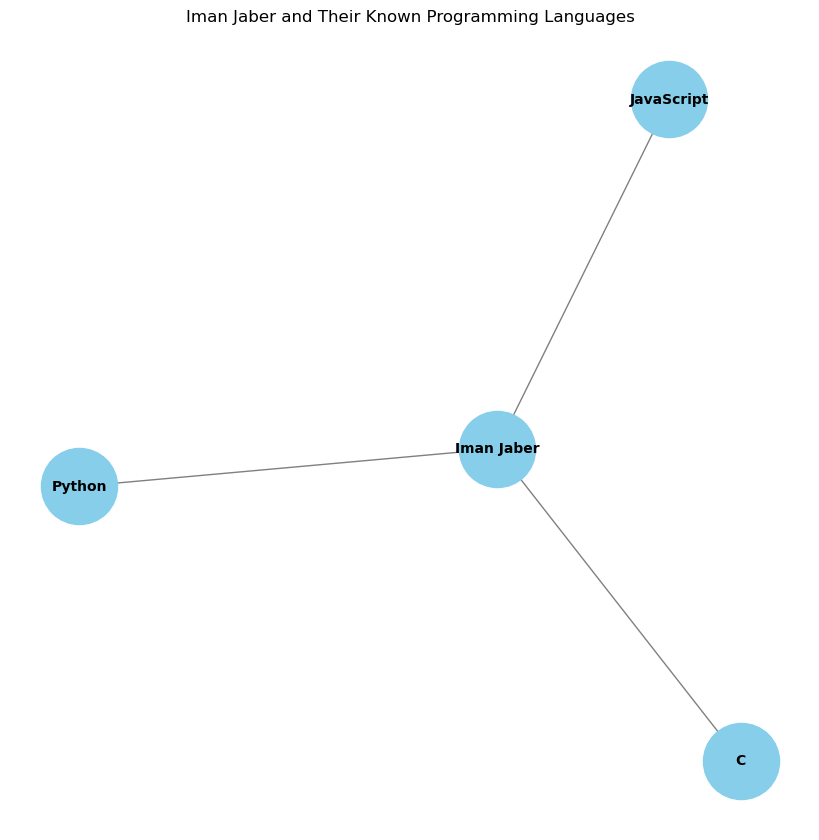

In [3]:
student_name = 'Iman Jaber'
programming_languages = ['JavaScript', 'Python', 'C']

G = nx.Graph()

G.add_node(student_name)

for language in programming_languages:
    G.add_node(language)
    G.add_edge(student_name, language)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title(f"{student_name} and Their Known Programming Languages")
plt.show()


In [4]:
print(df.columns)

Index(['Name', 'Year', 'Programming Languages', 'Certifications',
       'Project Count', 'Extracurricular Activities', 'Career Interest', 'Bio',
       'Cluster'],
      dtype='object')


## Question 4

Enter the certificate name:  Full Stack Web Development Certificate


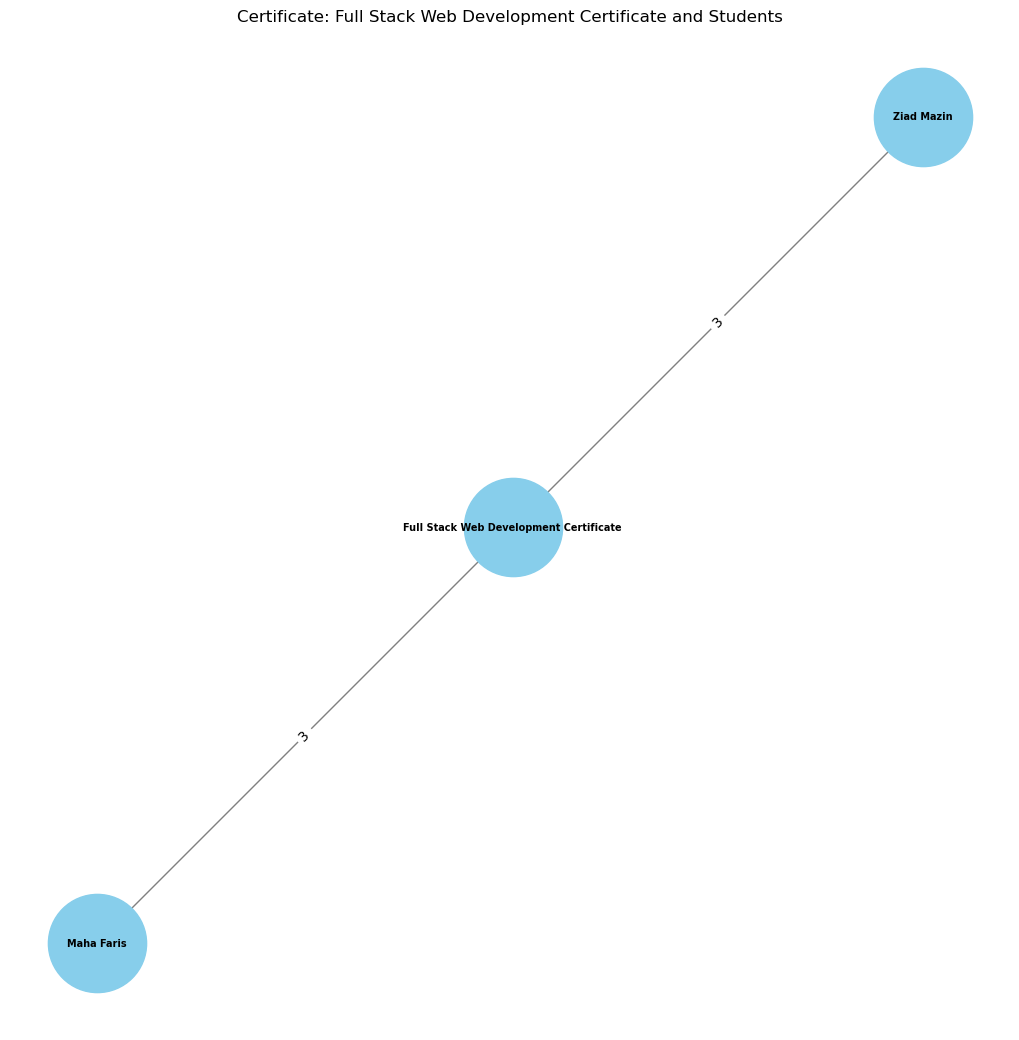

In [5]:
def create_certificate_graph(certificate_name):
    certificate_data = df[df['Certifications'] == certificate_name]
    if certificate_data.empty:
        print(f"Certificate '{certificate_name}' does not exist.")
        return  
        
    G = nx.Graph()
    G.add_node(certificate_name)
    for _, row in certificate_data.iterrows():
        student = row['Name']
        projects = row['Project Count']
        G.add_node(student)
        G.add_edge(student, certificate_name, weight=projects)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')  
    
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=7, font_weight='bold', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.title(f"Certificate: {certificate_name} and Students")
    plt.show()

certificate_input = input("Enter the certificate name: ")
create_certificate_graph(certificate_input)